file : XGBoost_titanic_ver2

# Install XGBoost and verify

XGBoost install ---> 

anconda prompt> conda install -c anaconda py-xgboost

In [1]:
# import module 
import xgboost as xgb
from xgboost import XGBClassifier

# verify xgboost version
print(xgb.__version__)  #1.3.3

1.3.3


## Python wrapper XGB parameters<br><br>

1. General parameter<br>
booster : gbtree(tree based model) | gbliner(linear model) ---> default : gbtree <br>
silent : default=0 (show print message) | silent=1 ---> do not print msg <br>
nthread : cpu의 실행 스레드 개수 조절, default : 모든 스레드 사용<br><br><br>

2. Booster parameter<br>
learning_rate : default=0.1, range(0:1) 합습률, 통상 0.2:0.3 선호<br>
n_estimators : defualt=100, weak learner 의 개수<br>
min_child_weight : default=1, range(0:무한), 트리에서 가지 나눌때 최소데이터 weight 의 총합, 값이 작을수록 과적합 경향<br>
min_split_loss : default=0, range(0:무한), gamma로도 표현, 리포 노드 추가분할 리프 최소값, 값이 작을수록 과적합 경향<br>
max_depth : default=3, range(0:무한), 트리의 깊이 지정, 통상 3~10 사이로 지정, 값이 크면 과적합 경향<br>
subsample : default=1, range(0:1), weak learner가 학습에 사용하는 데이터의 샘플링 비율, 1에 근접할수록 과적합 경향<br>
colsample_bytree : default=1, range(0:1), 트리 생성에 필요한 feature을 임의로 샘플링, 피처가 많을때 과적합 조절용도<br>
reg_lamda : default=1, L2 Regularization 적용 값, 피처 개수가 많을때 사용 검토, 값이 클수록 과적합 감소 효과<br>
reg_alpha : default=0, L1 Regularization 적용 값, 피처 개수가 많을때 사용 검토, 값이 클수록 과적합 감소 효과<br>
scale_pos_weight : default=1, 불균형 데이터셋의 균형을 유지, 원리는??<br><br><br>

3. Training task parameter<br><br>
    #objective :<br>
    1) reg:linear : 회귀<br>
    2) binary:logistic : 이진분류<br>
    3) multi:softmax : 다중분류, 클래스 반환<br>
    4) multi:softprob : 다중분류, 확률환<br>

    #eval_metric :<br>
    1)rmse : Root Mean Squared Error<br>
    2)mae : mean absolute error<br>
    3)logloss : Negative log-likelihood<br>
    4)error : binary classification error rate<br>
    5)merror : multiclass classification error rate<br>
    6)mlogloss: Multiclass logloss<br>
    7)auc: Area Under Curve<br><br>

# Load data & details


## Load data 

In [7]:
# module import 
from sklearn import metrics
import numpy as np
import pandas as pd
import seaborn as sns
import warnings 

# Ignore warnings
warnings.filterwarnings('ignore')

# data load 
df = pd.read_csv("C:\\Users\\icecr\\OneDrive\\CSV_file\\titanic\\train.csv")
#df = pd.read_csv("C:\\Users\\82103\\OneDrive\\CSV_file\\titanic\\train.csv")  #for notebook

pd.set_option('display.max_columns',15)  #column 출력개수 설정(자동생략 option off 기능)
df.head(5)

pd.set_option('display.max_rows',500)  #row 출력개수 설정(자동생략 option off 기능)
df[1:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## details

In [8]:
# Verify column and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# Label coulumn class ratio
print("<Label Class Ratio>")
df['Survived'].value_counts() /df.shape[0] 

<Label Class Ratio>


0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [10]:
# Verify null data
print("<Isnull>")
print(df.isnull().sum())
print('')
print("Total :", df.isnull().sum().sum())

<Isnull>
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Total : 866


# Pre-processing

## Drop features


In [11]:
# Deletel id column
df_1 = df.drop(['PassengerId'], axis=1)

In [12]:
# Delete other column
df_2 = df_1.drop(['Name', 'Ticket'], axis=1)
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


## Pre-processing : NaN

In [13]:
# Verify null data
print("<Isnull:df_2>")
print(df_2.isnull().sum())
print('')
print("Total :", df_2.isnull().sum().sum())

<Isnull:df_2>
Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Total : 866


In [14]:
# stuff
Age_mean = df_2['Age'].mean()
Age_mode = df_2['Age'].mode()
freq = df_2['Embarked'].value_counts().idxmax()
print(freq)
print(Age_mean)

##Pandas Grammer 
#df_2['Age'].value_counts()
#a = df_2[['Age','Survived']][df_2['Age']>=2]

S
29.69911764705882


In [15]:
# Verify null data
df_2['Age'].fillna(Age_mean, inplace=True)
df_2['Embarked'].fillna(freq, inplace=True)
df_2['Cabin'].fillna('N', inplace=True)

df_2['Cabin'] = df_2['Cabin'].str[:1]  #indexing

print("<Isnull:df_2>")
print(df_2.isnull().sum())
print('')
print("Total :", df_2.isnull().sum().sum())

<Isnull:df_2>
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

Total : 0


In [16]:
# Value count : Column processed NaN 
print("<Column : Sex> \n", df_2['Sex'].value_counts(), end='\n\n')
print("<Column : Embarked> \n", df_2['Embarked'].value_counts(), end='\n\n')
print("<Column : Cabin> \n", df_2['Cabin'].value_counts(), end='\n\n')

<Column : Sex> 
 male      577
female    314
Name: Sex, dtype: int64

<Column : Embarked> 
 S    646
C    168
Q     77
Name: Embarked, dtype: int64

<Column : Cabin> 
 N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64



## Get_dummy

In [17]:
# Create dummy column 
df_2 = pd.get_dummies(df_2, drop_first=True)  #drop_first help modeling better**

# delete Cabin_T ---> testset don't has Cabin_T, trainset has 1 data
df_2 = df_2.drop(['Cabin_T'], axis=1)
df_2

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_N,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,1,...,0,0,0,0,1,0,1
1,1,1,38.000000,1,0,71.2833,0,...,0,0,0,0,0,0,0
2,1,3,26.000000,0,0,7.9250,0,...,0,0,0,0,1,0,1
3,1,1,35.000000,1,0,53.1000,0,...,0,0,0,0,0,0,1
4,0,3,35.000000,0,0,8.0500,1,...,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1,...,0,0,0,0,1,0,1
887,1,1,19.000000,0,0,30.0000,0,...,0,0,0,0,0,0,1
888,0,3,29.699118,1,2,23.4500,0,...,0,0,0,0,1,0,1
889,1,1,26.000000,0,0,30.0000,1,...,0,0,0,0,0,0,0


In [ ]:
## Encoding individual

# from sklearn import preprocessing

# def encode_features(df):
#     features = [###columns###]
#     for feature in features:
#         le = preprocessing.LabelEncoder()
#         le = le.fit(df[feature])
#         df[feature] = le.transform(df[feature])
#     return df

## Pre-processing : Outlier


In [18]:
def get_outlier(df=None, column=None, weight=1.5):

    var1 = df[column]
    
    #25%, 75%  #numpy value ---> percentage
    quantile_25 = np.percentile(var1.values,25)
    quantile_75 = np.percentile(var1.values,75)
    
    #iqr
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr *weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    
    #conditions
    outlier_index = var1[(var1<lowest_val)|(var1>highest_val)].index
    #outlier_index = var1[(var1<lowest_val)].index
    #outlier_index = var1[(var1>highest_val)].index
    
    print("<Outliers>")
    print("highest_val :", highest_val)
    print("lowest_val :", lowest_val)
    print("len :",len(outlier_index), end='\n\n')
    
    return outlier_index, highest_val, lowest_val

out_index, h, l = get_outlier(df=df_2, column='Fare', weight=5)

# print values
df_2[['Fare','Survived']].iloc[out_index].head(10)

<Outliers>
highest_val : 146.448
lowest_val : -107.53760000000001
len : 31



,Fare,Survived
27,263.0000,0
31,146.5208,1
88,263.0000,1
118,247.5208,0
195,146.5208,1
258,512.3292,1
268,153.4625,1
297,151.5500,0
299,247.5208,1
305,151.5500,1


In [19]:
def transform_outlier(df=None, column=None, weight=1.5):
    x, var1, var2 = get_outlier(df=df, column=column, weight=weight)
    df[column].iloc[x]
    df[column].iloc[x] = var1
    return df

df_2 = transform_outlier(df=df_2, column='Fare', weight=5)
pd.set_option('display.max_rows',500)  #row 출력개수 설정(자동생략 option off 기능)
df_2.head()


<Outliers>
highest_val : 146.448
lowest_val : -107.53760000000001
len : 31



,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_N,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,...,0,0,0,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,...,0,0,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,...,0,0,0,0,1,0,1
3,1,1,35.0,1,0,53.1000,0,...,0,0,0,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,...,0,0,0,0,1,0,1


# Visualization & Analize

<AxesSubplot:>

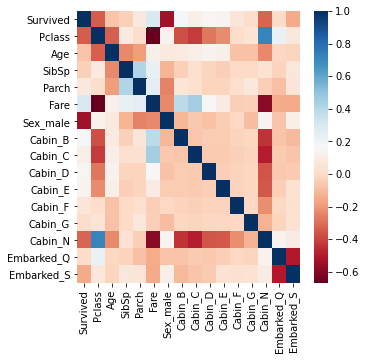

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
corr=df_2.corr()
sns.heatmap(corr, cmap='RdBu')

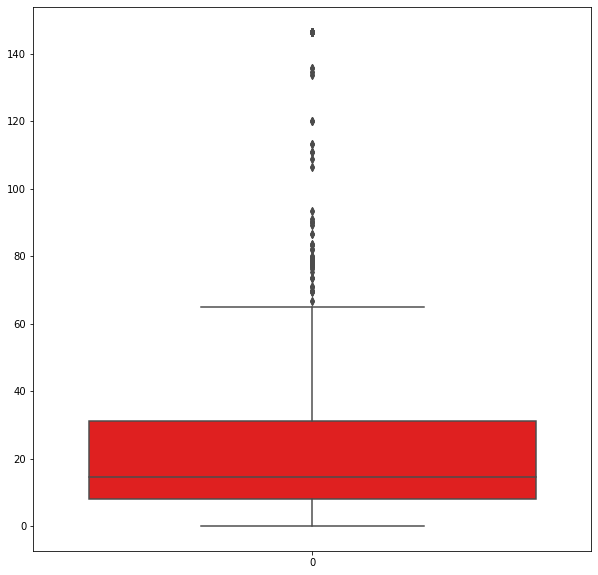

In [21]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df_2['Fare'], color='red')
plt.show()

In [23]:
# # import module
# import matplotlib.pyplot as plt
# import seaborn as sns
# %matplotlib inline

# # Pclass ~ Survived
# #sns.barplot(x='Sex', y='Survived', data=df_2)
# sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df_2)

In [25]:
# # Survived ~ Age

# def get_category(age):
#     cat = ''
#     if age <= -1 : cat='Unknown'
#     elif age <= 5: cat='Baby'
#     elif age <= 12: cat='Child'
#     elif age <= 18: cat='Teenager'
#     elif age <= 25: cat='Student'
#     elif age <= 35: cat='Young Adult'
#     elif age <= 60: cat='Adult'
#     else: cat='Elderly'
        
#     return cat

# plt.figure(figsize=(10,6))
# group_names=['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# df_2['Age_cat'] = df_2['Age'].apply(lambda x : get_category(x))
# sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=df_2, order=group_names)
# df_2.drop('Age_cat', axis=1, inplace=True)
            

# Testing:trainset
## without tuning tool

In [26]:
# Devide feature & label
y_df = df_2['Survived']
X_df = df_2.drop('Survived', axis=1)

# Devide trainset:testset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=0)

# Verify label ratio 
train_cnt = y_train.count()
test_cnt = y_test.count()

print('trainset :', X_train.shape)
print('testset :',X_test.shape, end='\n\n')

print("trainset label ratio")
print(y_train.value_counts()/train_cnt, end='\n\n')

print("trainset label ratio")
print(y_test.value_counts()/test_cnt)

trainset : (712, 16)
testset : (179, 16)

trainset label ratio
0    0.616573
1    0.383427
Name: Survived, dtype: float64

trainset label ratio
0    0.614525
1    0.385475
Name: Survived, dtype: float64


In [27]:
## Models

# Import module
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score

# Make object : classifier
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
lr_clf = LogisticRegression()


#DecisionTree
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('dt_Acc : {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('dt_roc_auc : {0:.4f}'.format(roc_auc_score(y_test, dt_clf.predict_proba(X_test)[:,1])))
print('')


#RandomForest
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('rf_Acc : {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('rf_roc_auc : {0:.4f}'.format(roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:,1])))
print('')


#LogisticRegression
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('lr_Acc : {0:.4f}'.format(accuracy_score(y_test, lr_pred)))
print('lr_roc_auc : {0:.4f}'.format(roc_auc_score(y_test, lr_clf.predict_proba(X_test)[:,1])))
print('')


##XGBoost
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(n_estimators=100)
xgb_clf.fit(X_train, y_train)
           
xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])
xgb_acc_score = accuracy_score(y_test, xgb_clf.predict(X_test))
print('')
print('xgb_Acc : {0:.4f}'.format(xgb_acc_score))
print('xgb_roc_auc : {0:.4f}'.format(xgb_roc_score))

ValueError: could not convert string to float: 'Young Adult'

In [ ]:
# # Feature importance = visualization

# from xgboost import plot_importance
# import matplotlib.pyplot as plt
# %matplotlib inline

# fig, ax = plt.subplots(1, 1, figsize=(10,8))
# plot_importance(xgb_clf, ax=ax, max_num_features=12, height=0.4)

## GridCV : XGBoost

In [28]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score


params = {#general params
          'booster':['gbtree'],  #default=gbtree, other:gblinear
          'silent':[0],  #default=0, other:1(=silent)    
          
          #Booster params
          'learning_rate':[0.1, 0.05, 0.01],  #default=0.1
          'n_estimators':[100,150,200,500],  #default=100
          'min_child_weight':[1,2],  #default=1
          'min_split_loss':[0,10,50],  #default=0  #gamma
          'max_depth':[3,4,5,6],  #default=3
          'subsample':[1],  #default=1
          'colsample_bytree':[0.8,1],  #default=1
          'reg_lamda':[1],  #default=1
          'reg_alpha':[0],  #default=0
          'scale_pos_weight':[1],  #default=1
    
          #Training task params    
          'objective':['binary:logistic'],  #default=logistic, other:index top
          'eval_metric':['error']  #default=rmse|error  #ohter : mae, logloss, merror, mlogloss
          }


xgb_clf = XGBClassifier()

xgb_grid = GridSearchCV(xgb_clf, 
                        param_grid=params, 
                        cv=5, 
                        scoring='accuracy',  #default=accuracy  #options : roc_auc, f1
                        refit=True,
                        n_jobs=-1, 
                        verbose=1
                       )

xgb_grid.fit(X_df, y_df)


## [Early stopping code]
# gridcv.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc',
#           eval_set=[(X_train, y_train), (X_test, y_test)])

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


ValueError: DataFrame.dtypes for data must be int, float, bool or categorical.  When
                categorical type is supplied, DMatrix parameter
                `enable_categorical` must be set to `True`.Age_cat

In [33]:
# Result
print('Best score :', xgb_grid.best_score_, end='\n\n')
print('Best parameters :')
xgb_grid.best_params_

Best score : 0.8428974954491244

Best parameters :


{'booster': 'gbtree',
 'colsample_bytree': 1,
 'eval_metric': 'error',
 'learning_rate': 0.05,
 'max_depth': 6,
 'min_child_weight': 2,
 'min_split_loss': 0,
 'n_estimators': 200,
 'objective': 'binary:logistic',
 'reg_alpha': 0,
 'reg_lamda': 1,
 'scale_pos_weight': 1,
 'silent': 0,
 'subsample': 1}

In [34]:
# Result details
cv_res_df = pd.DataFrame(xgb_grid.cv_results_)
cv_res_df.sort_values(by=['rank_test_score'], inplace=True)
cv_res_df[['params', 'mean_test_score', 'rank_test_score']].head()

,params,mean_test_score,rank_test_score
470,"{'booster': 'gbtree', 'colsample_bytree': 1, '...",0.842897,1
327,"{'booster': 'gbtree', 'colsample_bytree': 1, '...",0.841780,2
157,"{'booster': 'gbtree', 'colsample_bytree': 0.8,...",0.841768,3
159,"{'booster': 'gbtree', 'colsample_bytree': 0.8,...",0.840663,4
180,"{'booster': 'gbtree', 'colsample_bytree': 0.8,...",0.840657,5
